In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [6]:
df = pd.read_csv('../data/preprocessed_data.csv')

In [7]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,3,0.570801,0.3125,0.461431,0.504418,0.035756,0.143079,0.578613,...,0,1,0,0,0,0,0,0,0,1
1,Blue,False,3,0.000000,0.7500,0.411250,0.467500,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0
2,Blue,False,3,0.000000,0.0000,0.560000,0.550000,0.280000,0.000000,1.000000,...,0,1,0,0,0,0,0,0,0,1
3,Red,False,3,0.000000,0.1250,0.220625,0.515000,0.108750,0.250000,0.062500,...,0,1,0,0,0,0,0,0,1,0
4,Red,False,3,0.500000,0.0000,0.590000,0.465000,0.000000,0.500000,0.000000,...,0,0,0,1,0,0,1,0,0,0


### Normalizing data

In [8]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [9]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

### Splitting into train, test

In [10]:
y = df['Winner']
X = df.drop(columns = 'Winner')

# dont split into train/test here -> do so after dropping na value rows
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### NaN Error fix (else it occurs when trying to fit model)

not best practive here, row with Na value can differ from later scraping times

In [11]:
y.value_counts()

Red     4525
Blue    2315
Name: Winner, dtype: int64

In [12]:
len(y)

6841

In [13]:
y.isna().value_counts()

False    6840
True        1
Name: Winner, dtype: int64

In [14]:
y.loc[y.isna()]

191    NaN
Name: Winner, dtype: object

In [15]:
df.loc[[191]]

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
191,NaN,False,3,-0.566068,-0.461635,-1.56415,-0.391251,-1.150657,-0.281607,-0.601903,...,0,1,0,0,0,0,1,0,0,0


In [16]:
# y.drop(191, inplace=True)

In [1]:
# X.drop(191, inplace=True)

### Split into Train/Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [19]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [21]:
model.oob_score_

0.6611265004616805

In [22]:
y_preds = model.predict(X_test)

In [23]:
accuracy_score(y_test, y_preds)

0.6695906432748538

In [24]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [25]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('R_age', 0.021021959010755605),
 ('B_age', 0.016110942678476136),
 ('R_avg_opp_HEAD_landed', 0.015040313078744929),
 ('B_Reach_cms', 0.01464437725113775),
 ('R_avg_opp_SIG_STR_pct', 0.01352520465268611),
 ('R_avg_opp_SIG_STR_landed', 0.01218920884712499),
 ('B_Height_cms', 0.011785995196670285),
 ('R_Reach_cms', 0.011602301827207933),
 ('R_Height_cms', 0.01075746123153565),
 ('R_avg_opp_DISTANCE_landed', 0.010640132173954688),
 ('R_avg_SIG_STR_pct', 0.010582835009078506),
 ('R_avg_opp_BODY_att', 0.010457872936916277),
 ('B_avg_DISTANCE_att', 0.010442923781130835),
 ('B_avg_HEAD_landed', 0.010243172339791766),
 ('B_avg_SIG_STR_landed', 0.010161638708042604),
 ('R_Weight_lbs', 0.009955927595049313),
 ('R_total_time_fought(seconds)', 0.009949184546926665),
 ('R_avg_GROUND_att', 0.009920264507914498),
 ('R_avg_opp_DISTANCE_att', 0.009909409643578445),
 ('B_avg_DISTANCE_landed', 0.009771931222506025),
 ('R_avg_opp_HEAD_att', 0.00976675005889546),
 ('R_avg_GROUND_landed', 0.009719080714733

In [26]:
y_train.value_counts()

Red     4291
Blue    2207
Name: Winner, dtype: int64

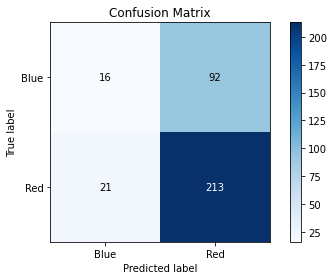

In [27]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [28]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python\python.exe -m pip install --upgrade pip' command.


In [29]:
from imblearn.over_sampling import ADASYN, SMOTE

In [30]:
over_sampler = ADASYN()
# over_sampler = SMOTE()

# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
# changed .fit_sample() to .fit_resample(), since .fit_sample() seems to be renamed in this version of imblearn library
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

In [31]:
pd.Series(y_resampled).value_counts()

Blue    4389
Red     4291
Name: Winner, dtype: int64

In [32]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [33]:
model2.oob_score_

0.7656682027649769

In [34]:
y2_preds = model2.predict(X_test)

In [35]:
accuracy_score(y_test, y2_preds)

0.6549707602339181

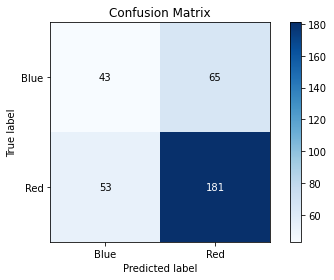

In [36]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [37]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [38]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

In [ ]:
model4 = rf_random.best_estimator_

In [ ]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

In [ ]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [ ]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = 1)
rf_grid.fit(X_resampled, y_resampled)

In [ ]:
rf_grid.best_params_

In [ ]:
model5 = rf_grid.best_estimator_

In [ ]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

In [ ]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(classification_report(y_test, y2_preds))

In [ ]:
print(classification_report(y_test, y3_preds))

In [ ]:
print(classification_report(y_test, y4_preds))